In [75]:
import pandas as pd
import os
from os import path
# Setting where our data is sitting
data_folder = path.join(
    path.abspath('..'),  # '..' means the directory above this one
    'data')
data_folder

'C:\\Users\\tdavies\\Desktop\\Data_Science\\CORE\\03-simple-predictions\\data'

In [76]:
raw_postcodes = \
    pd.read_csv(path.join(data_folder, 'australian_postcodes.csv')) \
      .dropna(how='any')

# We have to remove duplicate records (there's one for each suburb) so we aggregate them up
postcodes = pd.DataFrame.from_records([
        (postcode, df.long.mean(), df.lat.mean(), ', '.join(df.locality))
        for postcode, df in raw_postcodes.groupby('postcode')
    ],
    columns=('postcode', 'longitude', 'latitude', 'locality'),
    index='postcode'
)
postcodes.head()


,longitude,latitude,locality
postcode,,,
200,149.117136,-35.277272,AUSTRALIAN NATIONAL UNIVERSITY
800,130.955789,-12.801028,DARWIN
801,130.955789,-12.801028,DARWIN
804,130.843310,-12.432181,PARAP
810,130.873472,-12.376967,"ALAWA, BRINKIN, CASUARINA, JINGILI, LEE POINT,..."


In [77]:
fault_data = \
    pd.read_csv(path.join(data_folder, 'faults.csv')) \
      .dropna(how='any')

# rename columns
new_names = {
    'City': 'suburb',
    'Notif.Date': 'date',
    'PriorityType': 'type',
    'Pipe Material': 'material',
    'Pipe Size': 'size',
    'Notification': 'notif',
}
fault_data.rename(columns=new_names, inplace=True)
fault_data.head()

,notif,Notif.date,Notification Year,Code group,Damage Code,Code group.1,Cause code,Code group.2,ObjectPartCode,Functional Loc.,...,Priority,Priority Code,Description.1,User status,System status,Cause code text,suburb,Malfunct. start,Malfunct.end,Location
8,301297459,23/05/2013,2013,MNDAMAGE,BROK,MNCAUSE,3PTY,MNOBJECT,PIPE,00450977,...,1,SF1,BROKEN MAIN,INI OBLD,ATCO NOCO ORAS,3rd Party Intervention,SPENCER PARK,23/05/2013,23/05/2013,AL
9,301453151,10/07/2014,2014,MNDAMAGE,BROK,MNCAUSE,3PTY,MNOBJECT,PIPE,00450977,...,1,SF1,BROKEN MAIN,INI,ATCO NOCO NOPT ORAS,3rd Party Intervention,SPENCER PARK,10/07/2014,10/07/2014,AL
10,301506040,07/11/2014,2014,MNDAMAGE,BROK,MNCAUSE,3PTY,MNOBJECT,PIPE,00453028,...,1,SF1,M6WA324050 BROKEN MAIN,INI OBLD,ATCO NOCO NOPT ORAS,3rd Party Intervention,MOUNT CLARENCE,07/11/2014,07/11/2014,AL
11,301335630,28/08/2013,2013,MNDAMAGE,BROK,MNCAUSE,3PTY,MNOBJECT,PIPE,00479319,...,1,SF1,BROKEN MAIN,REIS,ATCO NOCO NOPT ORAS,3rd Party Intervention,YAKAMIA,28/08/2013,28/08/2013,AL
12,301267394,28/02/2013,2013,MNDAMAGE,BROK,MNCAUSE,ATCO,MNOBJECT,PIPE,00504762,...,1,SF1,PIP BKN MAIN - PAT DURING (ATCOGAS),REIS,ATCO NOCO NOPT ORAS,ATCO Operator,MIDDLETON BEACH,28/02/2013,28/02/2013,AL


In [78]:
fault_data = fault_data.join(postcodes, how='inner')

In [79]:
fault_data.head()

,notif,Notif.date,Notification Year,Code group,Damage Code,Code group.1,Cause code,Code group.2,ObjectPartCode,Functional Loc.,...,User status,System status,Cause code text,suburb,Malfunct. start,Malfunct.end,Location,longitude,latitude,locality
200,301686726,27/12/2015,2015,MNWORK,CHCK,MNREQUST,3PTY,MNOBJECT,PIPE,00928333,...,INI,ATCO NOCO ORAS,3rd Party Request,YAKAMIA,08/12/2015,08/12/2015,AL,149.117136,-35.277272,AUSTRALIAN NATIONAL UNIVERSITY
804,301715422,27/02/2016,2016,MNWORK,CHCK,MNCAUSE,3PTY,MNOBJECT,PIPE,00997313,...,INI,ATCO NOCO ORAS,3rd Party Intervention,ROELANDS,11/02/2016,12/02/2016,BU,130.843310,-12.432181,PARAP
810,301608085,27/06/2015,2015,MNWORK,CHCK,MNCAUSE,3PTY,MNOBJECT,PIPE,01002515,...,INI,ATCO NOCO ORAS,3rd Party Intervention,AUSTRALIND,17/06/2015,18/06/2015,BU,130.873472,-12.376967,"ALAWA, BRINKIN, CASUARINA, JINGILI, LEE POINT,..."
830,301279112,03/04/2013,2013,MNDAMAGE,BROK,MNCAUSE,3PTY,MNOBJECT,PIPE,00471543,...,INI OBLD,ATCO NOCO NOPT ORAS,3rd Party Intervention,WONTHELLA,03/04/2013,03/04/2013,GE,131.538018,-12.435425,"DRIVER, DURACK, FARRAR, GRAY, MARLOW LAGOON, M..."
835,300952434,07/07/2010,2010,MNDAMAGE,BROK,MNCAUSE,3PTY,MNOBJECT,PIPE,00878581,...,INI OBLD NORD,ATCO NOCO NOPT,3rd Party Intervention,BEACHLANDS,07/07/2010,07/07/2010,GE,131.029221,-12.513503,"HOWARD SPRINGS, VIRGINIA"


In [80]:
fault_data=fault_data.fillna(0)

In [81]:
# Splits from longitude
split_points = [
    ('longitude', 140, [False, True])  
]

In [82]:
import numpy as np
import seaborn as sns

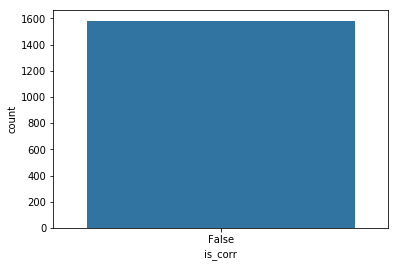

In [83]:
fault_data['is_corr'] = np.vstack([
    pd.cut(fault_data[longitude], bins=[0, split, 200], labels=is_corr)
    for longitude, split, is_corr in split_points
]).sum(axis=0) == 4
sns.countplot('is_corr', data=fault_data)

C:\Users\tdavies\AppData\Local\conda\conda\envs\CORE_Week_01\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\tdavies\AppData\Local\conda\conda\envs\CORE_Week_01\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\tdavies\AppData\Local\conda\conda\envs\CORE_Week_01\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\tdavies\AppData\Local\conda\conda\envs\CORE_Week_01\lib\site-packages\numpy\core\fromnumeric.py:83

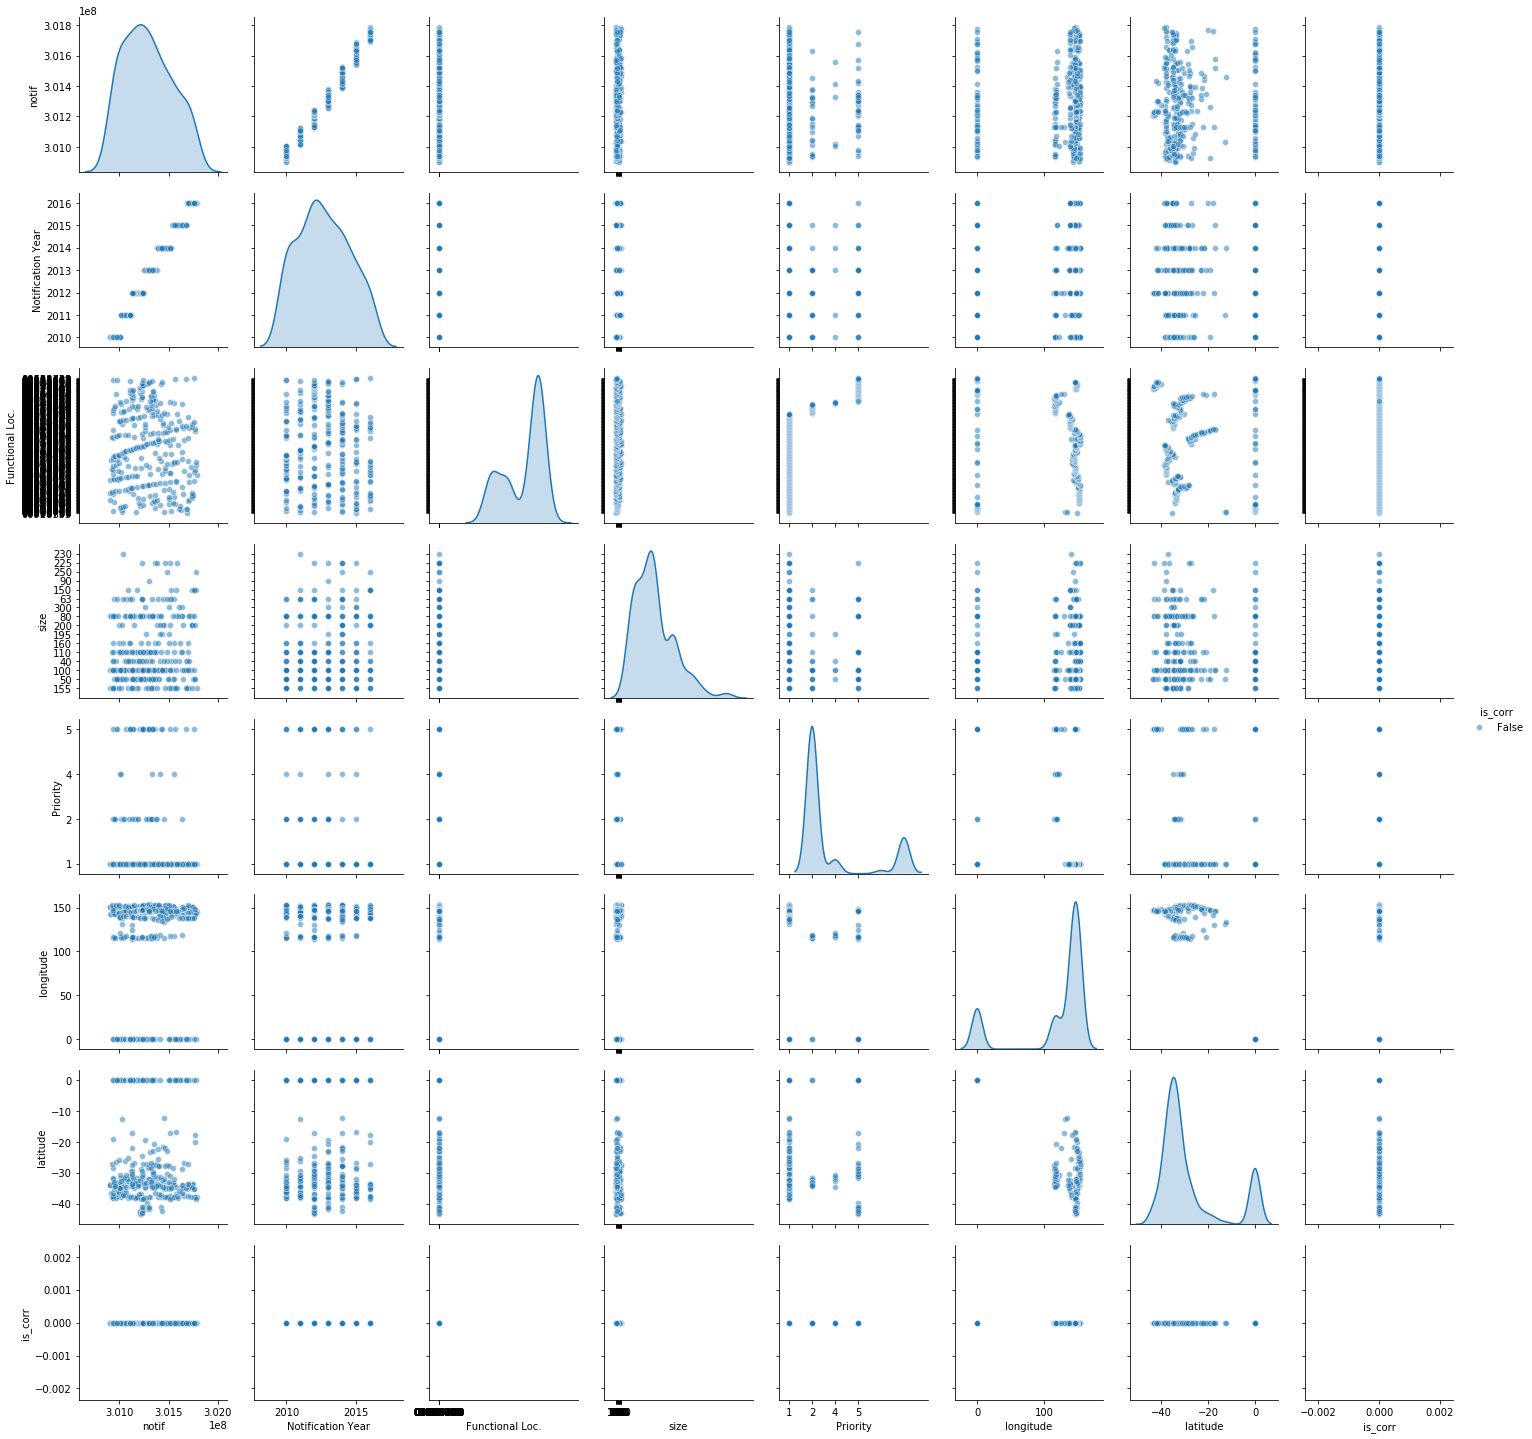

In [84]:
sns.pairplot(fault_data.iloc[::5], hue='is_corr', plot_kws={'alpha': 0.5})

C:\Users\tdavies\AppData\Local\conda\conda\envs\CORE_Week_01\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


TypeError: unsupported operand type(s) for /: 'str' and 'float'

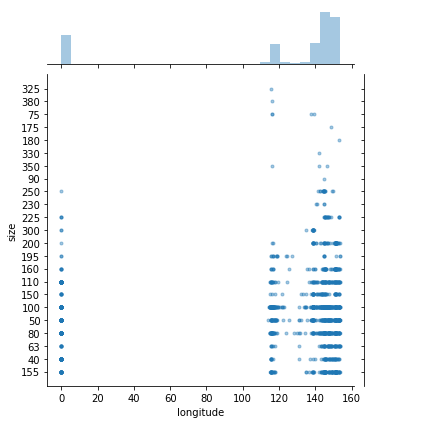

In [85]:
sns.jointplot('longitude', 'size', fault_data, joint_kws={'alpha': 0.4, 'marker': '.'})

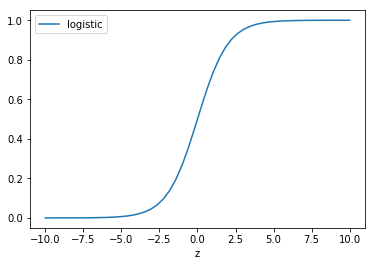

In [86]:
def logistic(z):    
    return 1 / (1 + np.exp(-z))

zs = np.linspace(-10, 10)
logistic_data = pd.DataFrame( 
    {'z': zs, 'logistic': logistic(zs)}
)
logistic_data.plot('z', 'logistic')

C:\Users\tdavies\AppData\Local\conda\conda\envs\CORE_Week_01\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


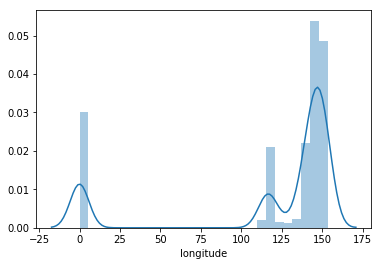

In [87]:
sns.distplot(fault_data['longitude'])

In [88]:
from sklearn import preprocessing, pipeline, linear_model

# Make up our pipeline where we transform the longitude first to make it more gaussian!
regressor = pipeline.Pipeline([
    ('transform', preprocessing.FunctionTransformer(np.log, validate=True)),
    ('model', linear_model.LogisticRegression())
])

In [89]:
X = fault_data[['longitude']]
y = fault_data['is_corr']

In [90]:
X

,longitude
200,149.117136
804,130.843310
810,130.873472
830,131.538018
835,131.029221
841,130.955789
850,132.262021
861,134.252508
862,134.828446
872,131.907703


In [91]:
regressor.fit(X, y)

C:\Users\tdavies\AppData\Local\conda\conda\envs\CORE_Week_01\lib\site-packages\sklearn\preprocessing\_function_transformer.py:161: RuntimeWarning: divide by zero encountered in log
  **(kw_args if kw_args else {}))


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
predict_df = pd.DataFrame(
    {'test_long_values': [110, 120, 130, 140, 150]} # Are these values ore?
)  
regressor.predict(predict_df)

In [ ]:
model = regressor.named_steps.model
model.intercept_, model.coef_

In [ ]:
def logistic(regressor, X):
    """
    Plot our logistic model given input values x
    
    We're doing this so that we can see the output of the logistic function - normally
    you'd just do `regressor.predict(x)` to get actual 1, 0 labels for your data.
    
    Parameters:
        regressor - a fitted logistic regression pipeline
        x - the values to evaulate the function at
    """
    # We can pull the model and transforms from our pipeline
    model = regressor.named_steps.model
    tf = regressor.named_steps.transform
    
    # Next we replay the steps in the pipeline to make a prediction
    z = model.intercept_ + model.coef_[0][0] * tf.transform(X)
    return 1 / (1 + np.exp(-z)).ravel()

In [ ]:
logistic(regressor, predict_df)

In [ ]:
f, ax = plt.subplots(1, 1)

# Some longitude values to predict from
longs = pd.DataFrame(
    {'test_long_values': np.linspace(0.1, 3)}
)

# An offset to stop everything plotting on top of everything else
offset = 0.02

# shows predictions given contents
predictions = regressor.predict(longs)
ax.plot(longs, predictions + offset, '.', alpha=0.7, label='predicted (+ offset)')  

# shows measured values plus jitter
jitter = np.random.normal(scale=0.01, size=len(fault_data))
ax.plot(fault_data['longitude'], fault_data['is_corr'] + jitter - offset, '.', alpha=0.1, label='measured (+ jitter - offset)')

# shows logistic function fitted from regressor
ax.plot(longs, logistic(regressor, longs), '--', label='fitted logistic function')

# Generate the logistic curve showing the location of 
ax.set_ylim(-0.1, 1.1)
ax.legend()
ax.set_title('Logistic regression with scikit-learn')
f.tight_layout()
#plot below: where y axis = 0.5 move across to logistic function. this shows hte cut off between is_ore and not is_ore.